# Aprendizaje Supervisado

In [ ]:
!pip install -q condacolab


In [ ]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:13
🔁 Restarting kernel...


In [ ]:
!pip install googletrans==3.1.0a0


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=81b8627d449bb05a19cade1d853531fd3c5fd15e552820bdd5283e685e413fc4
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
 

In [ ]:
import sys
print(sys.executable)
!conda --version

/usr/bin/python3.real
conda 23.1.0


In [ ]:
!conda install -c conda-forge root


Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ failed with initial frozen solve. Retrying with fle

In [ ]:
!python3 --version
import pandas as pd
import array,csv, os, time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
from graphviz import Source
from IPython.display import SVG
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.utils import resample
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score , confusion_matrix, auc
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score, roc_curve
from sklearn.metrics import RocCurveDisplay
from itertools import cycle
from sklearn import tree
import googletrans
from googletrans import Translator
from sklearn.tree import plot_tree
import ROOT
from ROOT import kBlack, kGray, kBlue, kRed,kGreen,kCyan,kViolet,kOrange,kCyan
from ROOT import TLegend,TH1F,TH2F, TCanvas,TPaveStats,TGraph, TMultiGraph

Python 3.10.10
Welcome to JupyROOT 6.28/00


# Ejercicio 1. Clasificación de enfermedades en función de los síntomas

In [ ]:

df = pd.read_csv('dataset.csv')
df.head()


Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14 Symptom_15  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Symptom_16 Symptom_17  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [ ]:
df.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [ ]:
## Verifiquemos si exiten valores nulos, en nuestro caso la variable "Disease" o enfermedad, es nuestra variable objetivo (reconstrucción supervisada).


df['Disease'].isnull().values.any()

False

In [ ]:
df['Symptom_5'].isnull().values.any()


True

In [ ]:
##Aplicamos el siguiente algortimo parea eliminar cadenas en 0
##

data = df[df.columns].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head()


Disease  Symptom_1             Symptom_2             Symptom_3  \
0  Fungal infection    itching             skin_rash  nodal_skin_eruptions   
1  Fungal infection  skin_rash  nodal_skin_eruptions   dischromic _patches   
2  Fungal infection    itching  nodal_skin_eruptions   dischromic _patches   
3  Fungal infection    itching             skin_rash   dischromic _patches   
4  Fungal infection    itching             skin_rash  nodal_skin_eruptions   

             Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0  dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                  NaN       NaN       NaN       NaN       NaN       NaN   
2                  NaN       NaN       NaN       NaN       NaN       NaN   
3                  NaN       NaN       NaN       NaN       NaN       NaN   
4                  NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14 Symptom_15  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Symptom_16 Symptom_17  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [ ]:
df = df.fillna(0)
df.head()
print(df.columns)
print(df.shape)



Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17'],
      dtype='object')
(4920, 18)


In [ ]:
descripcion = pd.read_csv('symptom_Description.csv')
descripcion.head()

Disease                                        Description
0   Drug Reaction  An adverse drug reaction (ADR) is an injury ca...
1         Malaria  An infectious disease caused by protozoan para...
2         Allergy  An allergy is an immune system response to a f...
3  Hypothyroidism  Hypothyroidism, also called underactive thyroi...
4       Psoriasis  Psoriasis is a common skin disorder that forms...

In [ ]:
translator = Translator()
enfermedades = []
desc = []

for i, element in descripcion.iterrows():

   d = element['Disease']
   f = translator.translate(d , src = 'en' , dest = 'es' ).text
   q = element['Description']
   n = translator.translate(q , src = 'en' , dest = 'es' ).text
   enfermedades.append(f)
   desc.append(n)

descripcion['Enfermedad'] = enfermedades
descripcion['Descripción'] = desc

descripcion.head()


Disease                                        Description  \
0   Drug Reaction  An adverse drug reaction (ADR) is an injury ca...   
1         Malaria  An infectious disease caused by protozoan para...   
2         Allergy  An allergy is an immune system response to a f...   
3  Hypothyroidism  Hypothyroidism, also called underactive thyroi...   
4       Psoriasis  Psoriasis is a common skin disorder that forms...   

           Enfermedad                                        Descripción  
0  reacción de drogas  Una reacción adversa a medicamentos (ADR, por ...  
1             Malaria  Enfermedad infecciosa causada por parásitos pr...  
2             Alergia  Una alergia es una respuesta del sistema inmun...  
3      hipotiroidismo  El hipotiroidismo, también llamado tiroides hi...  
4            Soriasis  La psoriasis es un trastorno común de la piel ...

In [ ]:
# Para sacar datos de otra base de datos

severidad = pd.read_csv('Symptom-severity.csv')
severidad.head()

Symptom  weight
0               itching       1
1             skin_rash       3
2  nodal_skin_eruptions       4
3   continuous_sneezing       4
4             shivering       5

In [ ]:
severidad.shape

(133, 2)

In [ ]:
## Esto nos permite observar solamente los datos unicos, sin multiplicidad

severidad['Symptom'].unique()

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue',
       'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings',
       'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat',
       'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain',
       'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever',
       'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure',
       'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes',
       'malaise', 'blurred_and_distorted_vision', 'phlegm',
       'throat_irritation', 'redness_of_eyes', 'sinus_pressu

Warning in <TROOT::Append>: Replacing existing TH1: Pesos (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Tp


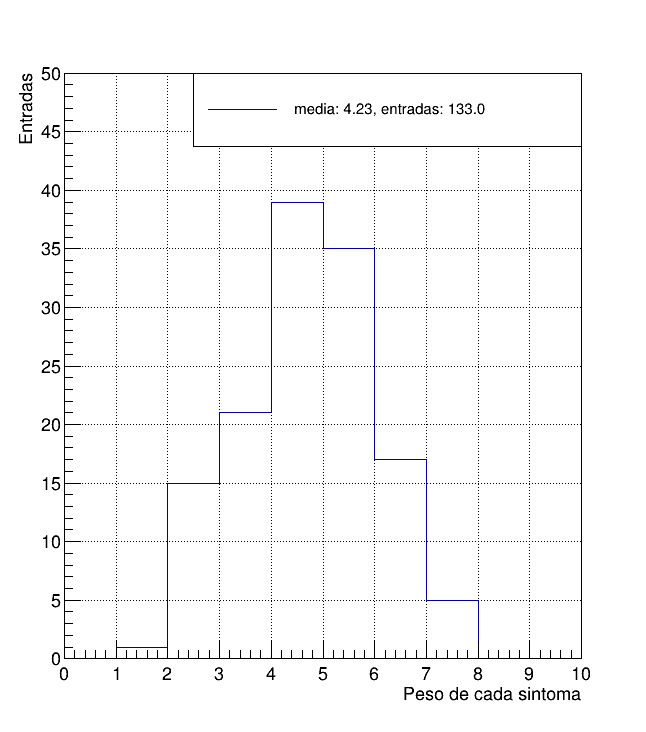

In [ ]:
Tp = TH1F("Pesos","",10, 0, 10)
we = severidad['weight'].values

for p in we:
   Tp.Fill(p)

Tp.SetStats(0)

mean_uno = Tp.GetMean()
entries_uno = Tp.GetEntries()

Tp.SetMaximum(50)
Tp.GetYaxis().SetLabelSize(0.03)
Tp.GetYaxis().SetTitleSize(0.03)
Tp.GetXaxis().SetLabelSize(0.03)
Tp.GetXaxis().SetTitleSize(0.03)
c = TCanvas("Tp", "canvas", 650 , 760)
Tp.Draw("")

legend = ROOT.TLegend(0.3, 0.8, 0.9, 0.9)
legend.SetTextSize(0.025)
legend.AddEntry(Tp, f" media: {mean_uno:.2f}, entradas: {entries_uno}", "l")
legend.Draw()

Tp.SetTitle(";Peso de cada sintoma; Entradas")
c.Draw()
c.SetGrid()
#c.SaveAs('dist.png')

In [ ]:
sint = severidad['Symptom'].unique()


In [ ]:
valores = df.values
valores_filtrados = valores

for i in range(len(sint)):
    j = severidad[severidad['Symptom'] == sint[i]]['weight'].values[0]
    print(sint[i], valores)
    valores_filtrados[valores == sint[i]] = j

itching [['Fungal infection' 'itching' 'skin_rash' ... 0 0 0]
 ['Fungal infection' 'skin_rash' 'nodal_skin_eruptions' ... 0 0 0]
 ['Fungal infection' 'itching' 'nodal_skin_eruptions' ... 0 0 0]
 ...
 ['Urinary tract infection' 'burning_micturition' 'bladder_discomfort'
  ... 0 0 0]
 ['Psoriasis' 'skin_rash' 'joint_pain' ... 0 0 0]
 ['Impetigo' 'skin_rash' 'high_fever' ... 0 0 0]]
skin_rash [['Fungal infection' 1 'skin_rash' ... 0 0 0]
 ['Fungal infection' 'skin_rash' 'nodal_skin_eruptions' ... 0 0 0]
 ['Fungal infection' 1 'nodal_skin_eruptions' ... 0 0 0]
 ...
 ['Urinary tract infection' 'burning_micturition' 'bladder_discomfort'
  ... 0 0 0]
 ['Psoriasis' 'skin_rash' 'joint_pain' ... 0 0 0]
 ['Impetigo' 'skin_rash' 'high_fever' ... 0 0 0]]
nodal_skin_eruptions [['Fungal infection' 1 3 ... 0 0 0]
 ['Fungal infection' 3 'nodal_skin_eruptions' ... 0 0 0]
 ['Fungal infection' 1 'nodal_skin_eruptions' ... 0 0 0]
 ...
 ['Urinary tract infection' 'burning_micturition' 'bladder_discomfort'
 

In [ ]:
df.head()

Disease Symptom_1 Symptom_2            Symptom_3  \
0  Fungal infection         1         3                    4   
1  Fungal infection         3         4  dischromic _patches   
2  Fungal infection         1         4  dischromic _patches   
3  Fungal infection         1         3  dischromic _patches   
4  Fungal infection         1         3                    4   

             Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0  dischromic _patches         0         0         0         0         0   
1                    0         0         0         0         0         0   
2                    0         0         0         0         0         0   
3                    0         0         0         0         0         0   
4                    0         0         0         0         0         0   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14 Symptom_15  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

  Symptom_16 Symptom_17  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0

In [ ]:
severidad_nuevo = pd.DataFrame(valores_filtrados,  columns = df.columns )
severidad_nuevo.head()

Disease Symptom_1 Symptom_2            Symptom_3  \
0  Fungal infection         1         3                    4   
1  Fungal infection         3         4  dischromic _patches   
2  Fungal infection         1         4  dischromic _patches   
3  Fungal infection         1         3  dischromic _patches   
4  Fungal infection         1         3                    4   

             Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0  dischromic _patches         0         0         0         0         0   
1                    0         0         0         0         0         0   
2                    0         0         0         0         0         0   
3                    0         0         0         0         0         0   
4                    0         0         0         0         0         0   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14 Symptom_15  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

  Symptom_16 Symptom_17  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0

In [ ]:

severidad_nuevo = severidad_nuevo.replace('dischromic _patches', 0)
severidad_nuevo = severidad_nuevo.replace('spotting_ urination',0)
severidad_nuevo = severidad_nuevo.replace('foul_smell_of urine',0)
severidad_nuevo.head()

Disease  Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  \
0  Fungal infection          1          3          4          0          0   
1  Fungal infection          3          4          0          0          0   
2  Fungal infection          1          4          0          0          0   
3  Fungal infection          1          3          0          0          0   
4  Fungal infection          1          3          4          0          0   

   Symptom_6  Symptom_7  Symptom_8  Symptom_9  Symptom_10  Symptom_11  \
0          0          0          0          0           0           0   
1          0          0          0          0           0           0   
2          0          0          0          0           0           0   
3          0          0          0          0           0           0   
4          0          0          0          0           0           0   

   Symptom_12  Symptom_13  Symptom_14  Symptom_15  Symptom_16  Symptom_17  
0           0           0           0           0           0           0  
1           0           0           0           0           0           0  
2           0           0           0           0           0           0  
3           0           0           0           0           0           0  
4           0           0           0           0           0           0

Warning in <TROOT::Append>: Replacing existing TH1: Sintoma 1 (Potential memory leak).


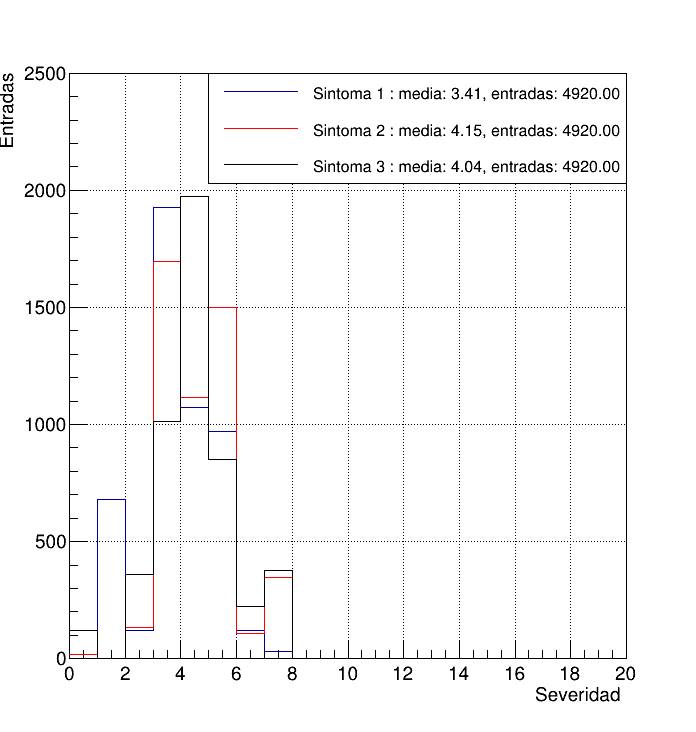

In [ ]:
T1 = TH1F("Sintoma 1","",20, 0, 20)
sin_uno = severidad_nuevo['Symptom_1'].values

T2 = TH1F("Sintoma 2","",20, 0, 20)
sin_dos = severidad_nuevo['Symptom_2'].values

T3 = TH1F("Sintoma 3","",20, 0, 20)
sin_tres = severidad_nuevo['Symptom_3'].values

for a in sin_uno:
   T1.Fill(a)

for b in sin_dos:
   T2.Fill(b)

for c in sin_tres:
   T3.Fill(c)

T1.SetStats(0)
T2.SetLineColor(kRed )
T3.SetLineColor(kBlack )

mean_uno = T1.GetMean()
entries_uno = T1.GetEntries()

mean_dos = T2.GetMean()
entries_dos = T2.GetEntries()

mean_tres = T3.GetMean()
entries_tres = T3.GetEntries()

T1.SetMaximum(2500)
T1.GetYaxis().SetLabelSize(0.03)
T1.GetYaxis().SetTitleSize(0.03)
T1.GetXaxis().SetLabelSize(0.03)
T1.GetXaxis().SetTitleSize(0.03)
c = TCanvas("T1", "canvas", 700 , 760)
T1.Draw("")
T2.Draw("SAME")
T3.Draw("SAME")

legend = ROOT.TLegend(0.3, 0.75, 0.9, 0.9)
legend.SetTextSize(0.025)
legend.AddEntry(T1, f"Sintoma 1 : media: {mean_uno:.2f}, entradas: {entries_uno:.2f}", "l")
legend.AddEntry(T2, f"Sintoma 2 : media: {mean_dos:.2f}, entradas: {entries_dos:.2f}", "l")
legend.AddEntry(T3, f"Sintoma 3 : media: {mean_tres:.2f}, entradas: {entries_tres:.2f}", "l")
legend.Draw()

T1.SetTitle(";Severidad ; Entradas")
c.Draw()
c.SetGrid()


<ipython-input-41-a11fa901d215>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = severidad_nuevo.corr(method = 'pearson')


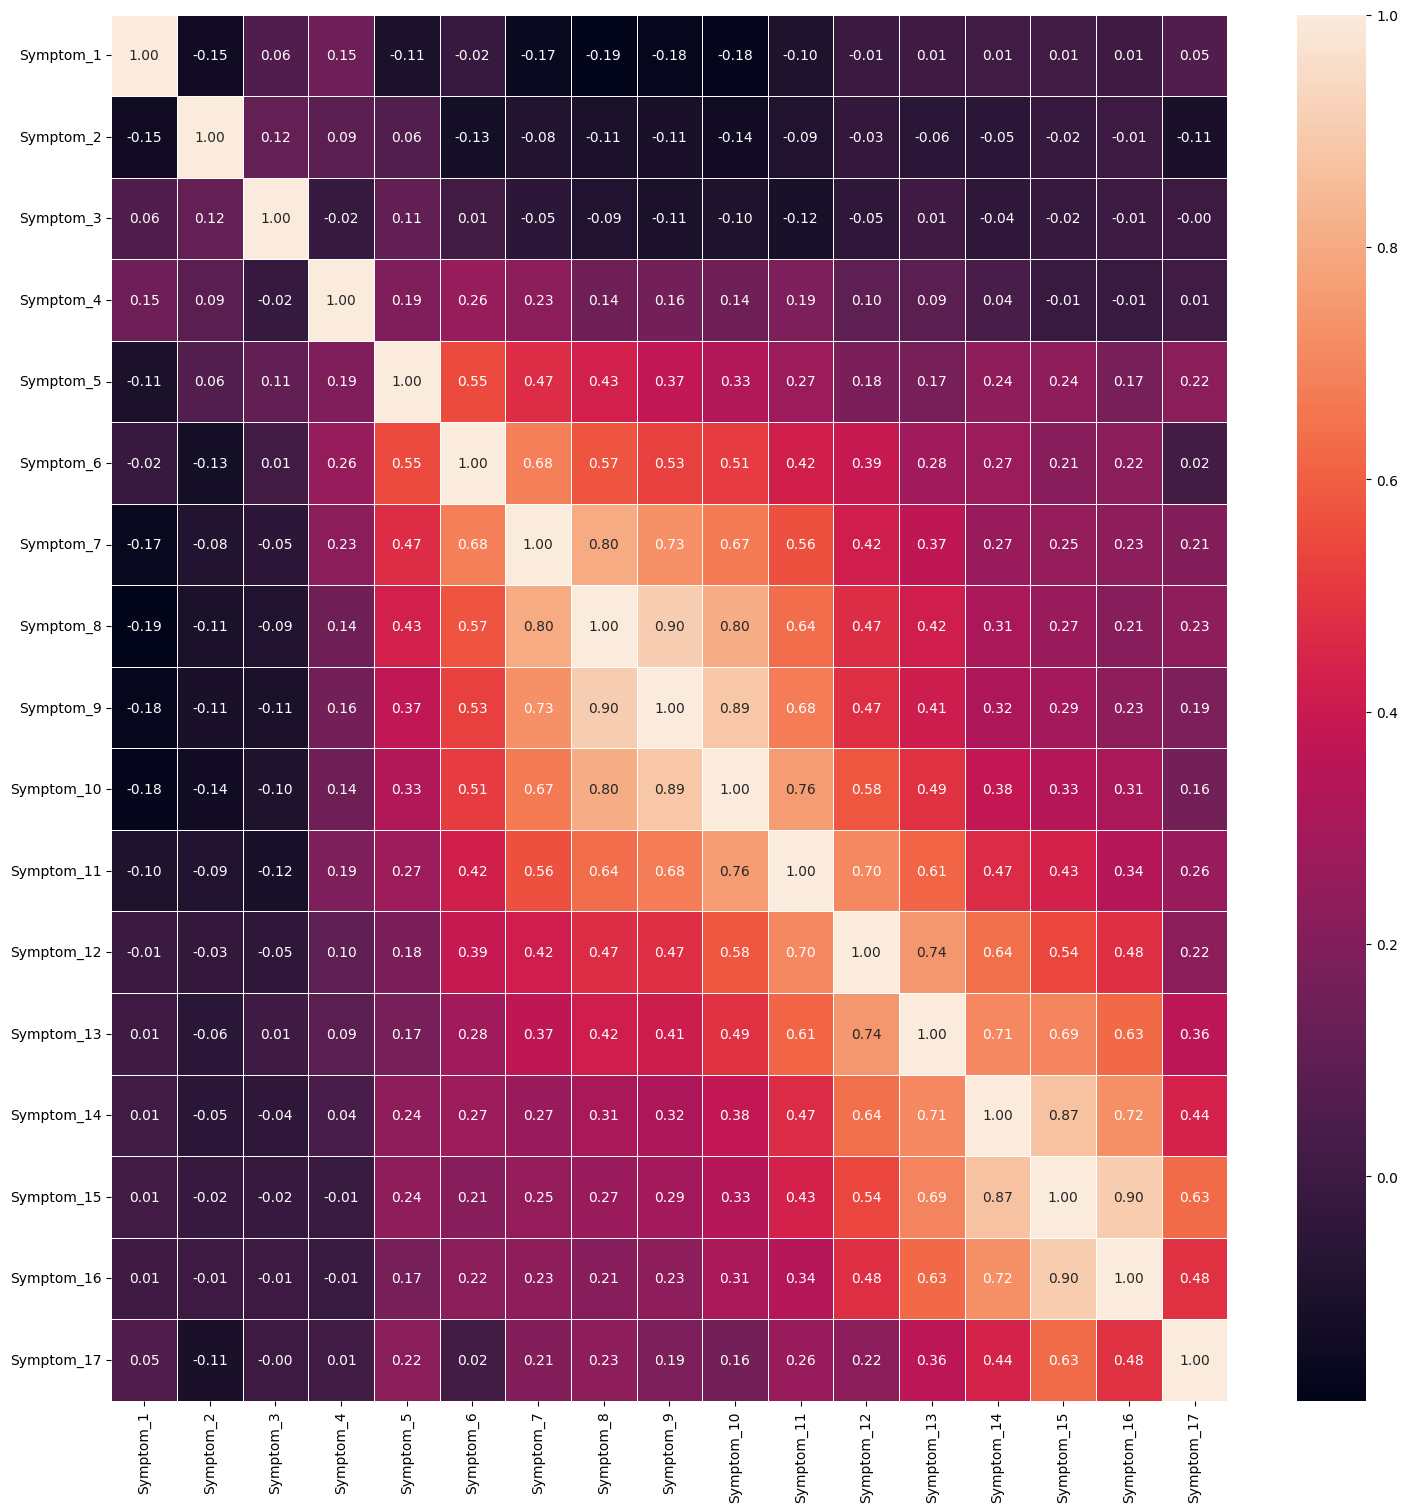

In [ ]:
# Creamos una matrix de correelacion utilizando el coeficiente de Pearson aunmque puede ser sustituido por spearman
correlation_matrix = severidad_nuevo.corr(method = 'pearson')

fig, ax = plt.subplots(figsize=(18 ,18 ))
sns.heatmap(correlation_matrix , annot = True,  linewidths=.5, ax=ax, fmt=".2f")
plt.show()


In [ ]:
## Para entrenar nuestro modelo predictivo hacemnos la division del dataset extraido de kaggle

dat = severidad_nuevo.drop(['Disease'],axis=1)
dat.head()

target = severidad_nuevo['Disease'].values
target

array(['Fungal infection', 'Fungal infection', 'Fungal infection', ...,
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dat, target, shuffle=True, train_size = 0.7)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3444, 17) (1476, 17) (3444,) (1476,)


<ipython-input-45-277b5621c99f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( severidad_nuevo.iloc[:,1:].values[k], ax = ax1[i][j], color = 'red')
<ipython-input-45-277b5621c99f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( severidad_nuevo.iloc[:,1:].values[k], ax = ax1[i][j], color = '

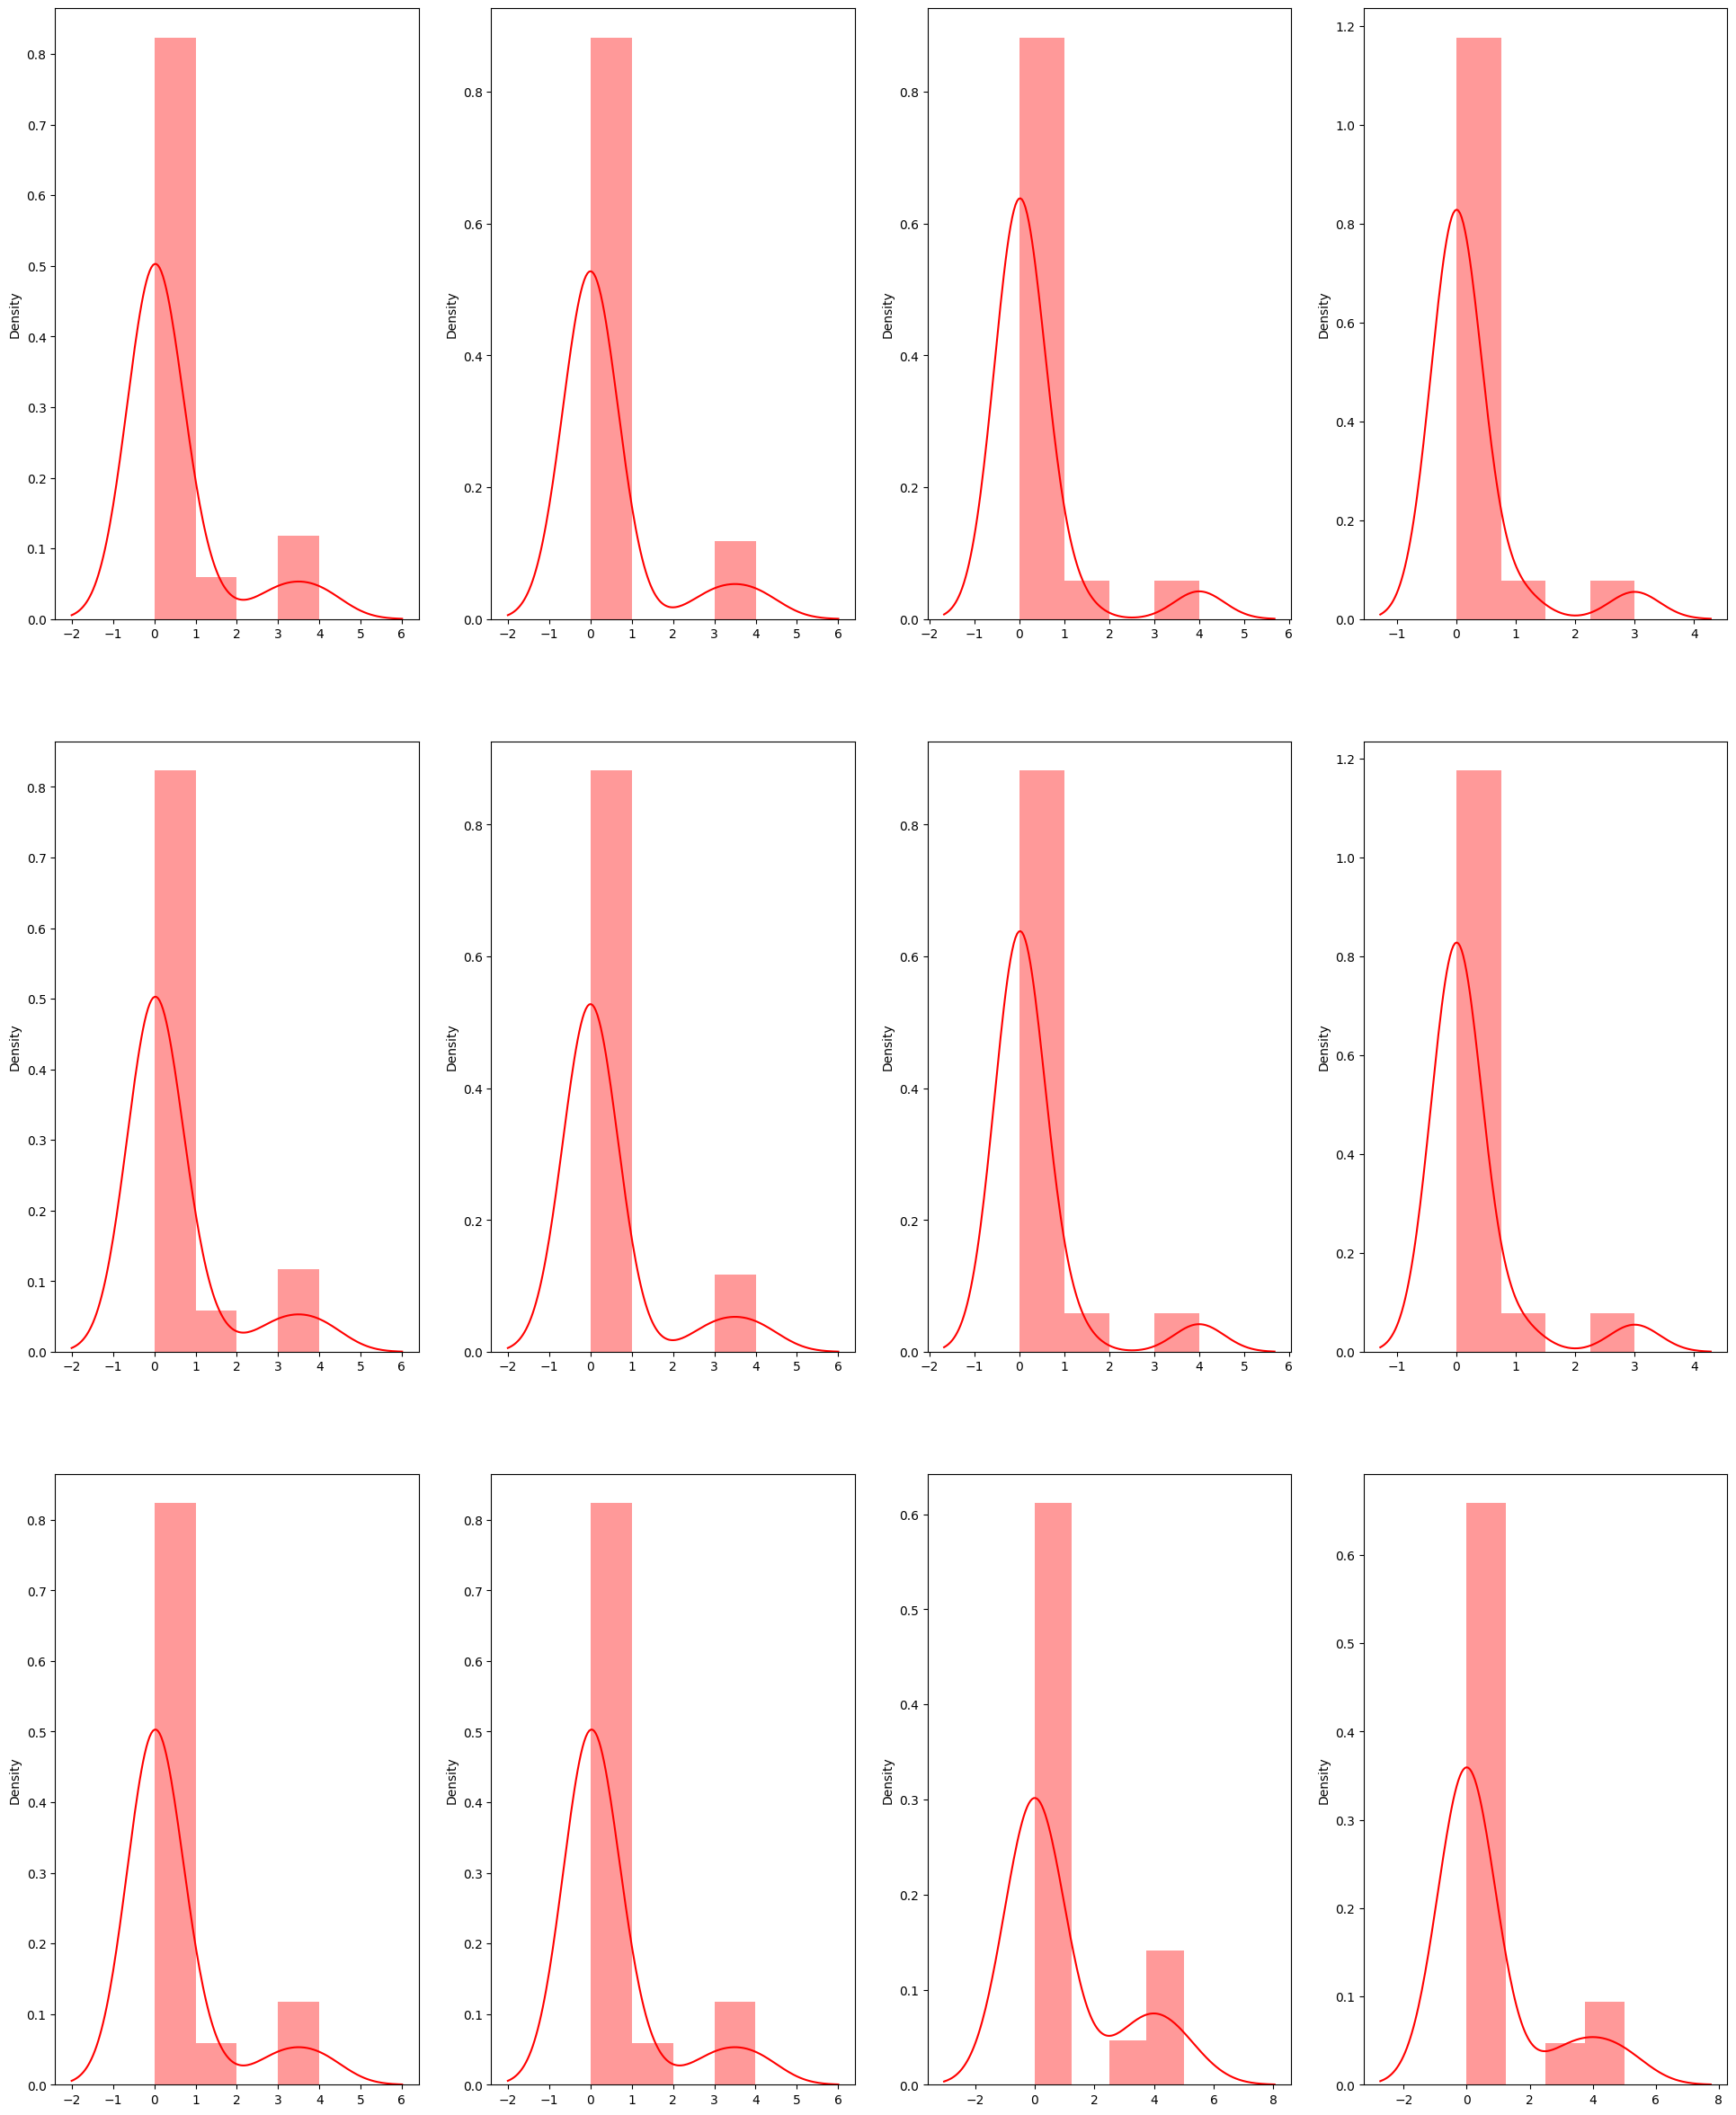

In [ ]:
color = sns.color_palette("pastel")
fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0

for i in range(3):
    for j in range(4):
            sns.distplot( severidad_nuevo.iloc[:,1:].values[k], ax = ax1[i][j], color = 'red')
            k += 1


In [ ]:
rf_model = RandomForestClassifier(max_depth=10 , n_estimators = 50, random_state=0,  oob_score=True  )
start = time.time()
rf_model.fit(x_train , y_train )
stop = time.time()
print(f"Tiempo de entrenamiento: {stop - start}s")


Tiempo de entrenamiento: 0.42583298683166504s


In [ ]:
pred_forest = rf_model.predict(x_test)
pred_forest
rf_model.score(x_train , y_train )



0.9883855981416957

In [ ]:
rf_model.score(x_test, y_test)


0.986449864498645

In [ ]:
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

forest_importances = pd.Series(importances, index = dat.columns )


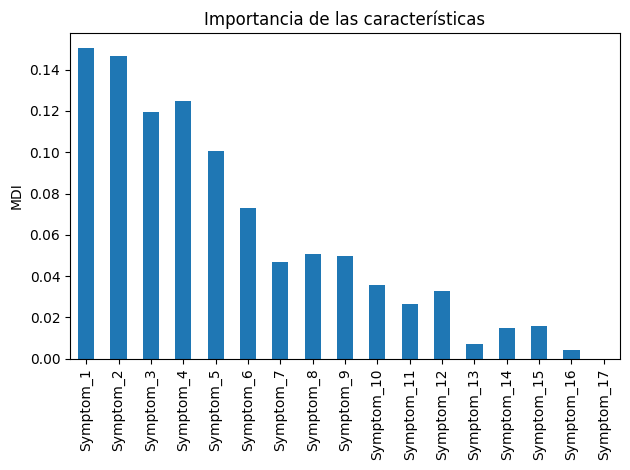

In [ ]:

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Importancia de las características")
ax.set_ylabel("MDI")
fig.tight_layout()

In [ ]:
IMP = rf_model.feature_importances_.argsort()
print("Características principales (de derecha a izquierda en importancia):")
print(IMP+1)

#el 1 es para corregir el index de python en 0

Características principales (de derecha a izquierda en importancia):
[17 16 13 14 15 11 12 10  7  9  8  6  5  3  4  2  1]


In [ ]:
## Salvaremos el modelo entrenado
## (muy útil cuando los tiempos de entrenamiento son muy tardados):


pickle.dump(rf_model , open("rf.pickle.dat", "wb"))

In [ ]:
conf_mat_forest = confusion_matrix(y_test, pred_forest)
print(  conf_mat_forest  )

[[34  0  0 ...  0  0  0]
 [ 0 42  0 ...  0  0  0]
 [ 0  0 33 ...  0  0  0]
 ...
 [ 0  0  0 ... 32  0  0]
 [ 0  0  0 ...  0 44  0]
 [ 0  0  0 ...  0  0 28]]


[Text(0.630835262345679, 0.9545454545454546, 'x[8] <= 3.5\ngini = 0.975\nsamples = 2177\nvalue = [84, 89, 108, 78, 100, 84, 85, 80, 76, 70, 76, 73\n78, 99, 77, 72, 78, 89, 82, 91, 94, 80, 89, 92\n104, 78, 86, 80, 69, 83, 72, 71, 87, 91, 81, 98\n90, 70, 87, 70, 103]'),
 Text(0.3820408950617284, 0.8636363636363636, 'x[4] <= 2.5\ngini = 0.965\nsamples = 1517\nvalue = [84, 89, 108, 78, 100, 84, 85, 80, 0, 70, 0, 0\n0, 99, 77, 72, 78, 89, 82, 0, 94, 34, 0, 92\n104, 0, 0, 80, 69, 83, 72, 71, 87, 91, 0, 98\n0, 0, 87, 70, 0]'),
 Text(0.16319444444444445, 0.7727272727272727, 'x[3] <= 6.5\ngini = 0.925\nsamples = 690\nvalue = [0, 89, 108, 0, 100, 84, 0, 26, 0, 0, 0, 0, 0\n22, 77, 72, 0, 89, 82, 0, 0, 0, 0, 34, 0, 0\n0, 30, 0, 0, 0, 16, 87, 0, 0, 98, 0, 0, 87\n0, 0]'),
 Text(0.15084876543209877, 0.6818181818181818, 'x[4] <= 1.0\ngini = 0.923\nsamples = 658\nvalue = [0, 89, 108, 0, 100, 84, 0, 26, 0, 0, 0, 0, 0\n22, 77, 72, 0, 89, 35, 0, 0, 0, 0, 34, 0, 0\n0, 30, 0, 0, 0, 16, 87, 0, 0, 98, 0, 0, 8

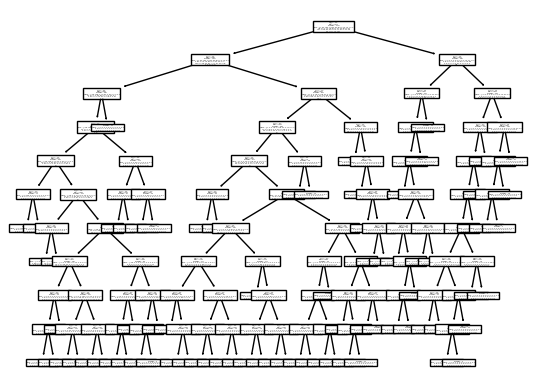

In [ ]:
tree.plot_tree(rf_model.estimators_[0])

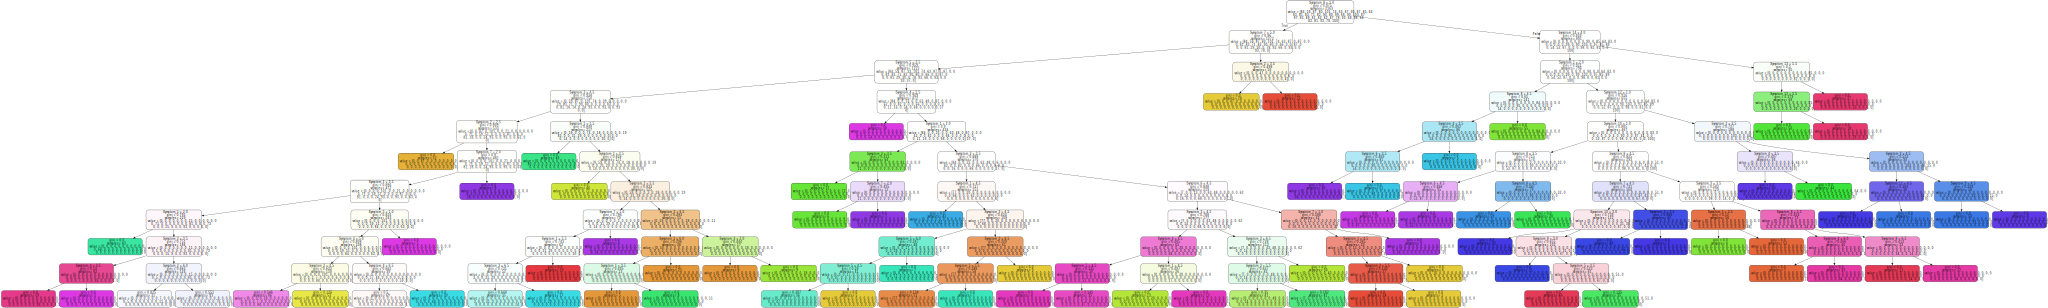

In [ ]:
# Exportar el árbol de decisión del modelo Random Forest a formato DOT
ss = tree.export_graphviz(
    rf_model.estimators_[1],
    out_file=None,
    feature_names=dat.columns,
    filled=True,
    rounded=True,
    special_characters=True
)

# Crear una fuente para el gráfico a partir del string DOT
graph = graphviz.Source(ss)

# Mostrar el gráfico
graph


F1-score (valor-F) = 9.894060019837298 | Accuracy (precisión) = 17.005420054200542


<Axes: >

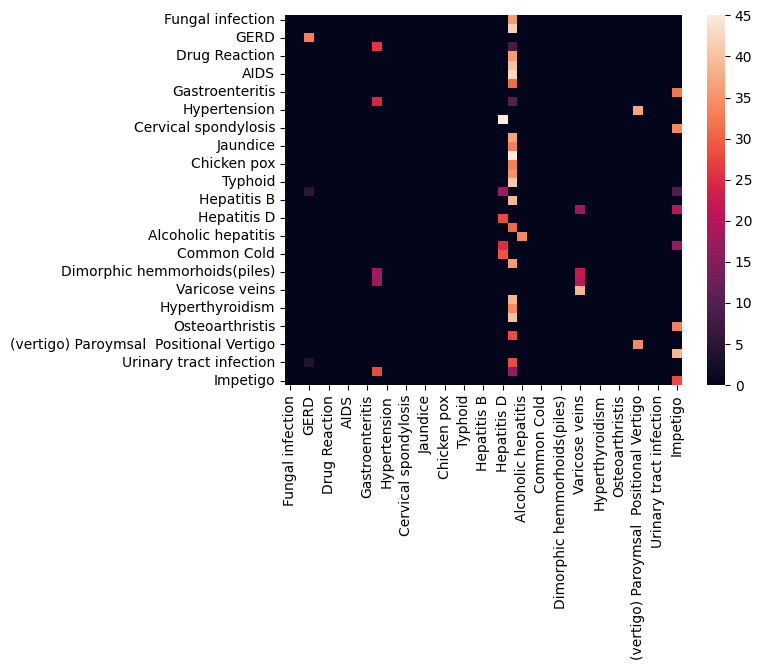

In [ ]:
df_forest = pd.DataFrame(conf_mat_forest, index=severidad_nuevo['Disease'].unique(), columns=severidad_nuevo['Disease'].unique())

print('F1-score (valor-F) =', f1_score(y_test, pred_forest , average='macro')*100, '|', 'Accuracy (precisión) =', accuracy_score(y_test, pred_forest)*100)
sns.heatmap(df_forest)

# Ejercicio de clasificacion de imagenes con Aprendizaje Supervisado

Notebook clasificación de imágenes usando Keras aplicación de aprendizaje automático (Redes neuronales)

In [ ]:
import numpy as np #Biblioteca para crear arreglos.
import matplotlib.pyplot as plt #Biblioteca para plotear.
import cv2 #Biblioteca para análisis de imágenes.
import pandas as pd #Biblioteca para importar datos.
from astropy.io import fits #Biblioteca para adquirir datos desde archivos fits.
from google.colab import drive #Biblioteca para importar datos desde google drive.
from astropy.visualization import make_lupton_rgb #Biblioteca para convertir imágenes a RGB desde archivos fits.
from google.colab.patches import cv2_imshow #Biblioteca con parche para mostrar imágenes desde cv2.
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops #Biblioteca para extracción de características desde los niveles de gris en una matriz de co-ocurrencia.
from sklearn import preprocessing #Biblioteca para normalizar datos.
from sklearn.model_selection import train_test_split #Biblioteca para divir los datos de entrenamiento.
from keras.models import Sequential #Biblioteca para crear modelos secuenciales.
from keras.layers import Dense #Biblioteca para crear las capas de las redes neuronales (Una capa consta de una función de cálculo de tensor de entrada y tensor de salida).
from tensorflow import keras #Biblioteca para crear optimizadores.
from sklearn.metrics import roc_curve #Biblioteca para determinar datos de la curva característica operativa del receptor (ROC).
from sklearn.metrics import roc_auc_score #Biblioteca para determinar puntuaje de la clasificación de los datos.


In [ ]:


!wget https://dr10.sdss.org/sas/dr10/boss/photoObj/frames/301/6073/4/frame-u-006073-4-0063.fits.bz2
!wget https://dr10.sdss.org/sas/dr10/boss/photoObj/frames/301/6073/4/frame-i-006073-4-0063.fits.bz2
!wget https://dr10.sdss.org/sas/dr10/boss/photoObj/frames/301/6073/4/frame-g-006073-4-0063.fits.bz2




--2023-08-17 17:08:04--  https://dr10.sdss.org/sas/dr10/boss/photoObj/frames/301/6073/4/frame-u-006073-4-0063.fits.bz2
Resolving dr10.sdss.org (dr10.sdss.org)... 155.101.19.32
Connecting to dr10.sdss.org (dr10.sdss.org)|155.101.19.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3320613 (3.2M) [application/octet-stream]
Saving to: ‘frame-u-006073-4-0063.fits.bz2’

frame-u-006073-4-00 100%[===================>]   3.17M  3.49MB/s    in 0.9s    

2023-08-17 17:08:06 (3.49 MB/s) - ‘frame-u-006073-4-0063.fits.bz2’ saved [3320613/3320613]

--2023-08-17 17:08:06--  https://dr10.sdss.org/sas/dr10/boss/photoObj/frames/301/6073/4/frame-i-006073-4-0063.fits.bz2
Resolving dr10.sdss.org (dr10.sdss.org)... 155.101.19.32
Connecting to dr10.sdss.org (dr10.sdss.org)|155.101.19.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3044154 (2.9M) [application/octet-stream]
Saving to: ‘frame-i-006073-4-0063.fits.bz2’

frame-i-006073-4-00 100%[============

In [ ]:
!bunzip2 /content/frame-u-006073-4-0063.fits.bz2
!bunzip2 /content/frame-i-006073-4-0063.fits.bz2
!bunzip2 /content/frame-g-006073-4-0063.fits.bz2

In [ ]:


M42u = fits.open('/content/frame-u-006073-4-0063.fits')
M42i = fits.open('/content/frame-i-006073-4-0063.fits')
M42g = fits.open('/content/frame-g-006073-4-0063.fits')



In [ ]:

Mg = M42g[0].data
Mi = M42i[0].data
Mu = M42u[0].data

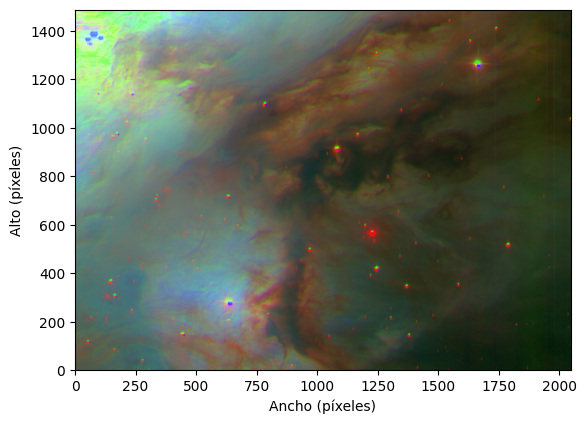

In [ ]:


rgb_default = make_lupton_rgb(Mi,Mg,Mu, stretch=1.5,Q=10)

plt.imshow(rgb_default,origin='lower')
plt.xlabel('Ancho (píxeles)')
plt.ylabel('Alto (píxeles)')
plt.savefig('rgbM42.png')



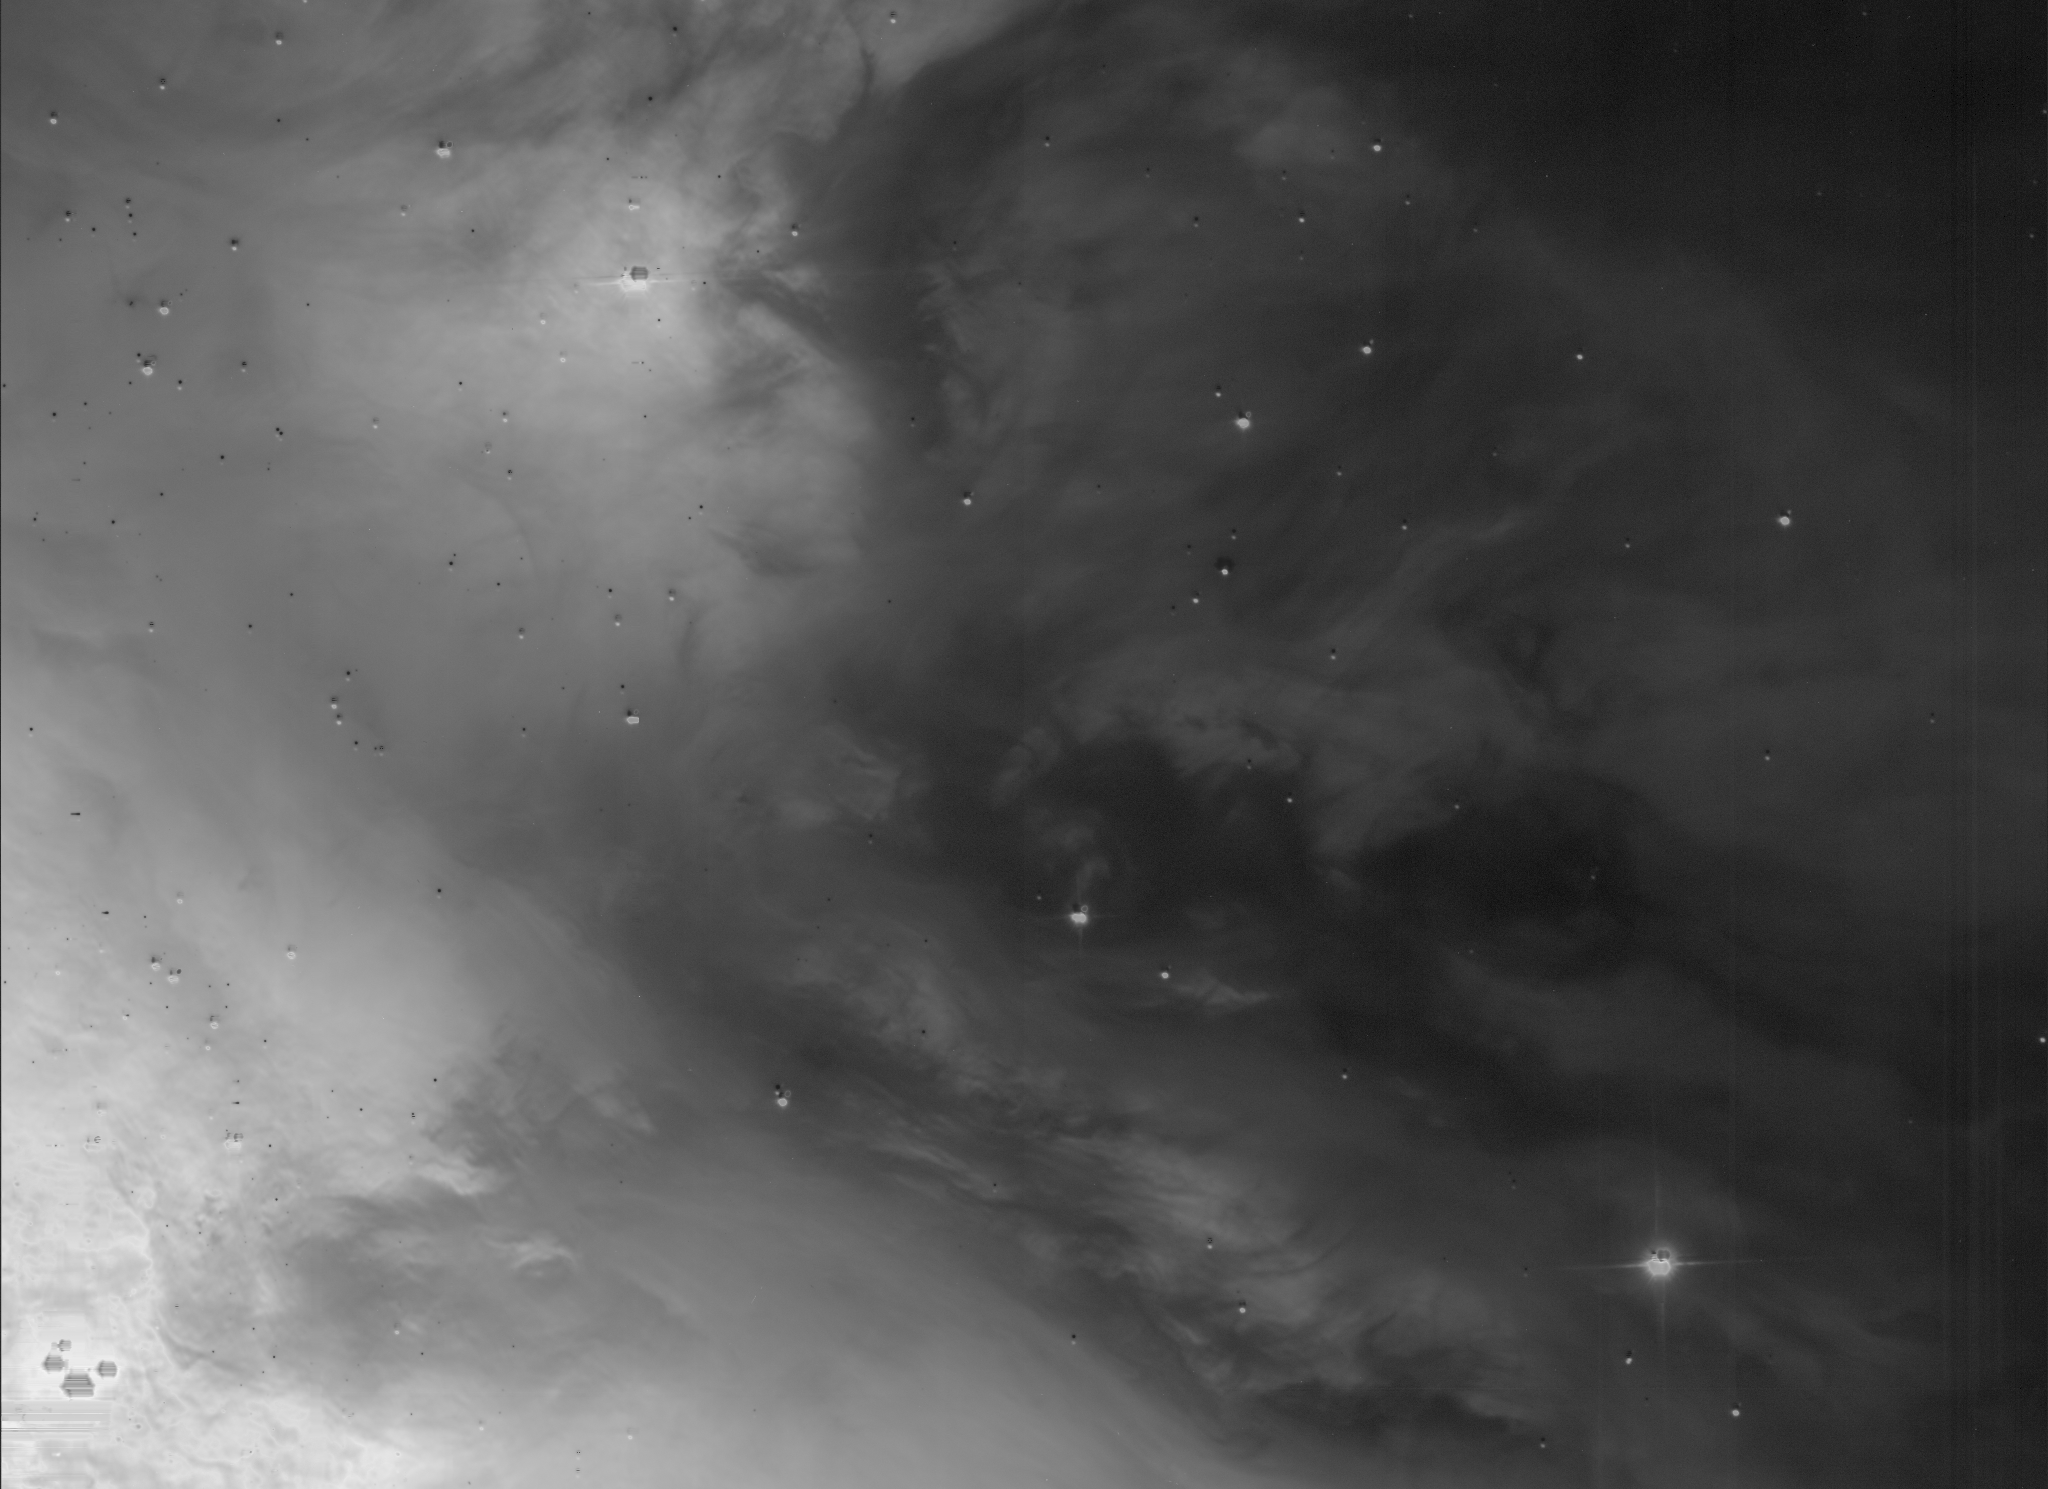

Text(0, 0.5, 'Alto (píxeles)')

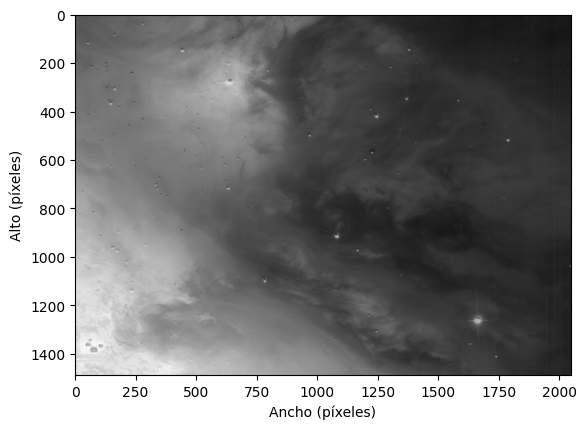

In [ ]:
grayscale_image = cv2.cvtColor(rgb_default, cv2.COLOR_BGR2GRAY)
#plt.imshow(img_gris)
cv2.imwrite('/content/M42_gray.png', grayscale_image)
cv2_imshow(grayscale_image)
#cv2_imshow.xlabel('Ancho (píxeles)')
#cv2_imshow.ylabel('Alto (píxeles)')
plt.imshow(grayscale_image,cmap=plt.get_cmap("gray"))
plt.xlabel('Ancho (píxeles)')
plt.ylabel('Alto (píxeles)')

Text(0, 0.5, 'Alto (píxeles)')

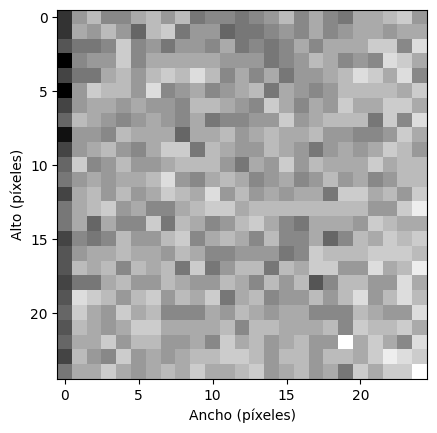

In [ ]:


#Este es un ejemplo de la ventana de 25 x 25 que se adquiere de la imagen original en este caso M42.

window = grayscale_image[1:1+25, 1:1+25]
plt.imshow(window, cmap=plt.get_cmap("gray"))
plt.xlabel('Ancho (píxeles)')
plt.ylabel('Alto (píxeles)')



In [ ]:
## Estas características son almacenadas en un archivo csv

height, width= grayscale_image.shape
#array_Total = np.array
result = []
for i in range (0,height,25):
  for j in range (0,width,25):
    arrayData = np.arange(10,dtype = float)
    window = grayscale_image[i:i+25, j:j+25]
    arrayData[0] = window.min()
    arrayData[1] = window.max()
    arrayData[2] = window.mean()
    arrayData[3] = window.std()
    # Finding GLMC features from co-occurrance matrix
    gCoMat = greycomatrix(window.astype(int),[2],[0],256,symmetric=True, normed=True) #Co-occurrence matrix
    contrast = greycoprops(gCoMat, prop='contrast')
    dissimilarity = greycoprops(gCoMat, prop='dissimilarity')
    homogeneity = greycoprops(gCoMat, prop='homogeneity')
    energy = greycoprops(gCoMat, prop='energy')
    correlation = greycoprops(gCoMat, prop='correlation')
    arrayData[4] = contrast[0][0]
    arrayData[5] = dissimilarity[0][0]
    arrayData[6] = homogeneity[0][0]
    arrayData[7] = energy[0][0]
    arrayData[8] = correlation[0][0]
    arrayData[9] = 1
    #print('arrayData',arrayData)
    result.append(arrayData)
    #plt.imshow(window,origin='lower')
#print('res',result)
np.savetxt("M42_training_data.csv", result,header="Min,Max,Mean,Std,Contrast,Dissimilarity,Homogeneity,Energy,Correlation, Class")

Se truncaron las últimas líneas 5000 del resultado de transmisión.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  remo

In [ ]:
df = pd.read_csv('M42_training_data.csv')

In [ ]:
df.head()

# Min  Max  Mean  Std  \
0  3.500000000000000000e+01 8.600000000000000000e...  NaN   NaN  NaN   
1  7.800000000000000000e+01 8.700000000000000000e...  NaN   NaN  NaN   
2  8.000000000000000000e+01 9.000000000000000000e...  NaN   NaN  NaN   
3  8.200000000000000000e+01 9.100000000000000000e...  NaN   NaN  NaN   
4  8.300000000000000000e+01 9.500000000000000000e...  NaN   NaN  NaN   

   Contrast  Dissimilarity  Homogeneity  Energy  Correlation   Class  
0       NaN            NaN          NaN     NaN          NaN     NaN  
1       NaN            NaN          NaN     NaN          NaN     NaN  
2       NaN            NaN          NaN     NaN          NaN     NaN  
3       NaN            NaN          NaN     NaN          NaN     NaN  
4       NaN            NaN          NaN     NaN          NaN     NaN

# Aprendizaje Profundo

# Ejemplo de analisis de diferencia entre gatos, perros y salvajes
# Basado en redes neuronales convolucionales

In [ ]:
import pandas as pd #Biblioteca para importar datos.
import numpy as np #Biblioteca para crear arreglos.
from matplotlib import pyplot as plt #Biblioteca para plotear.
from IPython.display import Image #Biblioteca para mostrar imágenes.
import tensorflow as tf #Biblioteca para crear modelos de máquinas de aprendizaje.
import keras # Biblioteca Keras es una API de aprendizaje profundo escrita en Python, que se ejecuta sobre la plataforma de aprendizaje automático TensorFlow
from tensorflow.keras import layers # Biblioteca para crear capas, las cuales son componentes básicos de las redes neuronales en Keras
from tensorflow.keras.models import Sequential #Biblioteca para crear modelos secuenciales.
from keras.layers import Conv2D, MaxPool2D, Activation #Biblioteca para importar capas convolucionales, max pooling y funciones de activación
from keras.layers import Dropout, Dense, Flatten, BatchNormalization #Biblioteca para importar Dropout(establece aleatoriamente las unidades de entrada), Flatten (tranformación de mapa de características a un vector columna), y  BatchNormalization La normalización por lotes aplica una transformación entre 0-1
from keras.layers import Dense #Biblioteca para crear las capas de las redes neuronales (Una capa consta de una función de cálculo de tensor de entrada y tensor de salida).
from keras.optimizers import Adam #Biblioteca del optimizador que implementa el algoritmo Adam.
from tensorflow.keras.applications import ResNet152V2  # Biblioteca para usar modelos entrenados
from keras.layers import Dense, GlobalAvgPool2D as GAP, Dropout  # Biblioteca para denifir modelos de capas
from keras.callbacks import ModelCheckpoint, EarlyStopping  # Biblioteca para objeto que puede realizar acciones en varias etapas de entrenamiento
from keras.models import load_model # Biblioteca para cargar modelos de entrenamiento .h5

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:

physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 1


In [ ]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [ ]:
!nvidia-smi

Thu Aug 17 17:19:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    27W /  70W |    387MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Obtencion del data set de DropBox
!wget https://www.dropbox.com/scl/fi/xgxt0a4dwuu57ttqhy7hn/Dataset_Animals.zip?rlkey=zo9qhjm3yvopx7wdqmbui83xz&dl=0 -O Dataset_Animals.zip

/bin/bash: line 1: -O: command not found
--2023-08-17 17:19:56--  https://www.dropbox.com/scl/fi/xgxt0a4dwuu57ttqhy7hn/Dataset_Animals.zip?rlkey=zo9qhjm3yvopx7wdqmbui83xz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/e/scl/fi/xgxt0a4dwuu57ttqhy7hn/Dataset_Animals.zip?rlkey=zo9qhjm3yvopx7wdqmbui83xz [following]
--2023-08-17 17:19:56--  https://www.dropbox.com/e/scl/fi/xgxt0a4dwuu57ttqhy7hn/Dataset_Animals.zip?rlkey=zo9qhjm3yvopx7wdqmbui83xz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce820b3005c6b8f959b6b9ff5f7.dl.dropboxusercontent.com/cd/0/get/CB8LsODT0WknSMz6ucl7K2W5KO0B_u6LlBJfdmreNMCMtGqx6nh9JeDmCbi8KXKCcUR9teExOM3XbqiF2IU-3BG7cTUb9KvIUsTa-5zdGDTNDnFoR8zUtbR9xZL_2bYmO8tDkFJoc4LCo2TbvKU9xxj5/file# [follow

In [ ]:
!unzip Dataset_Animals.zip?rlkey=zo9qhjm3yvopx7wdqmbui83xz

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: afhq/train/wild/flickr_wild_001378.jpg  
  inflating: afhq/train/wild/flickr_wild_001379.jpg  
  inflating: afhq/train/wild/flickr_wild_001380.jpg  
  inflating: afhq/train/wild/flickr_wild_001381.jpg  
  inflating: afhq/train/wild/flickr_wild_001382.jpg  
  inflating: afhq/train/wild/flickr_wild_001384.jpg  
  inflating: afhq/train/wild/flickr_wild_001385.jpg  
  inflating: afhq/train/wild/flickr_wild_001386.jpg  
  inflating: afhq/train/wild/flickr_wild_001387.jpg  
  inflating: afhq/train/wild/flickr_wild_001388.jpg  
  inflating: afhq/train/wild/flickr_wild_001389.jpg  
  inflating: afhq/train/wild/flickr_wild_001390.jpg  
  inflating: afhq/train/wild/flickr_wild_001391.jpg  
  inflating: afhq/train/wild/flickr_wild_001392.jpg  
  inflating: afhq/train/wild/flickr_wild_001393.jpg  
  inflating: afhq/train/wild/flickr_wild_001394.jpg  
  inflating: afhq/train/wild/flickr_wild_001395.jpg  
  inflating: af

In [ ]:
train_dir = '/content/afhq/train/' # Datos de entrenamiento
test_dir = '/content/afhq/val/'  #Datos de Prueba

In [ ]:
batch_size = 64 # Inicialmente 64
img_height = 512
img_width = 512

In [ ]:


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir, #ruta de la carpeta con imágenes
    validation_split=0.3, #70% para el conjunto de entrenamiento y 30% para el conjunto de prueba
    subset='training', # categoría entrenamiento
    seed=123, # Semilla aleatoria opcional
    image_size=(img_height, img_width), #Tamaño de las imágenes
    batch_size=batch_size) #Tamaño de lote de datos, si no se específica entonces de determina 32



Found 14630 files belonging to 3 classes.
Using 10241 files for training.


In [ ]:


test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir, #ruta de la carpeta con imágenes
  validation_split=0.3, #70% para el conjunto de entrenamiento y 30% para el conjunto de prueba
  subset="validation", # categoría validación (prueba)
  seed=123, #Semilla aleatoria opcional
  image_size=(img_height, img_width), #Tamaño de las imágenes
  batch_size=batch_size) #Tamaño de lote de datos, si no se específica entonces de determina 32



Found 1500 files belonging to 3 classes.
Using 450 files for validation.


In [ ]:


class_names = train_ds.class_names
print(class_names)



['cat', 'dog', 'wild']


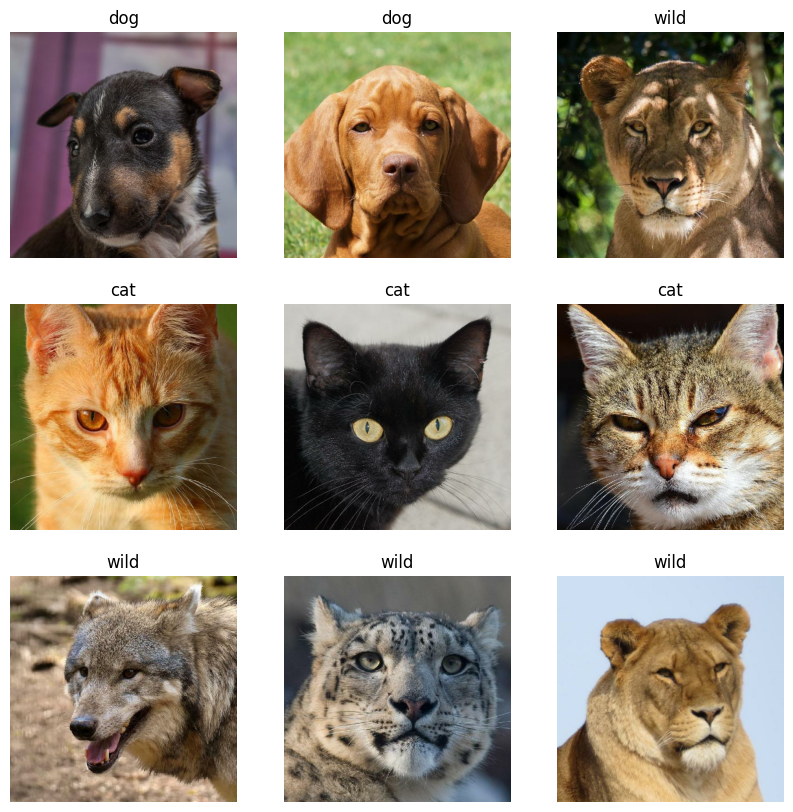

In [ ]:
plt.figure(figsize= (10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
X_train, y_train = next(iter(normalized_ds))
first_image = X_train[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:


normalized_test = test_ds.map(lambda x, y: (normalization_layer(x), y))
X_test, y_test = next(iter(normalized_test))
first_img = X_test[0]
print(np.min(first_img), np.max(first_img))



0.0 1.0


In [ ]:


y_train = tf.keras.utils.to_categorical(y_train, 3)
y_test = tf.keras.utils.to_categorical(y_test, 3)




In [ ]:
#Se genera un modelo de red neuronal convolucional

#3 capas de convolución

#3 capas de Max pooling

#1 capa Flatten

#3 capas de Densas

#En cuanto al optimizador se ocupa el descenso por gradiente estocástico ADAM [2]

model = Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(512, 512, 3)),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=128, activation="relu"),
  tf.keras.layers.Dense(units=64, activation="relu"),
  tf.keras.layers.Dense(units=3, activation="softmax")
])

#opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer='adam', loss = 'CategoricalCrossentropy',
                   metrics = ['accuracy']) #0.001-> Default, batch_size -> Default 32



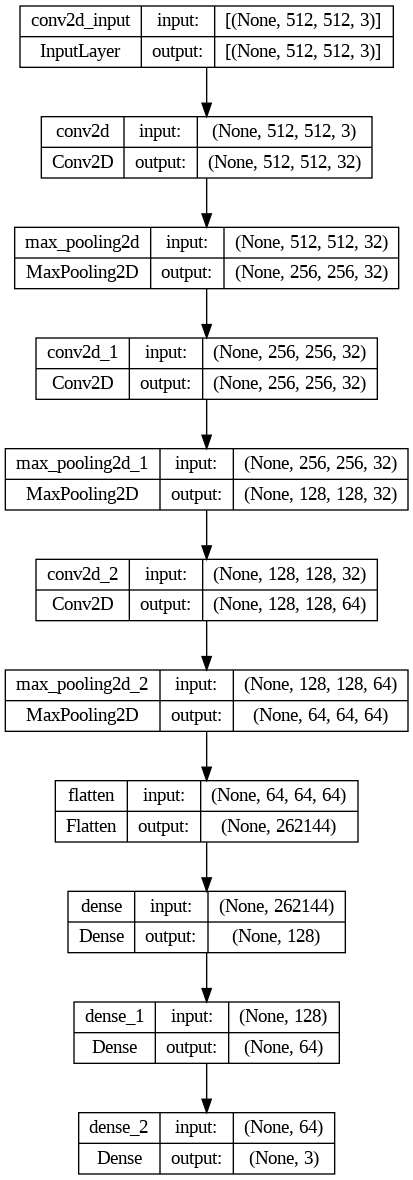

In [ ]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)
#Se necesita antes intalar Pydot   pip install pydot

In [ ]:
#Se realiza un entrenamiento con 10 epocas a iterar.

history = model.fit(
    X_train, y_train, # Datos de entrenamiento
    epochs = 15, #Número de epocas
    validation_data=(X_test, y_test), #Se asigan los datos de validación
    verbose=1 #verbosidad. 0 = sin impresión, 1 = barra de progreso, 2 = una línea por época.
)



Epoch 1/15
2/2 [==============================] - 1s 588ms/step - loss: 0.5651 - accuracy: 0.8281 - val_loss: 0.9771 - val_accuracy: 0.5156
Epoch 2/15
2/2 [==============================] - 1s 913ms/step - loss: 0.4848 - accuracy: 0.8750 - val_loss: 1.2681 - val_accuracy: 0.4688
Epoch 3/15
2/2 [==============================] - 1s 927ms/step - loss: 0.4612 - accuracy: 0.8281 - val_loss: 1.2260 - val_accuracy: 0.4844
Epoch 4/15
2/2 [==============================] - 1s 504ms/step - loss: 0.4091 - accuracy: 0.8281 - val_loss: 0.9703 - val_accuracy: 0.6406
Epoch 5/15
2/2 [==============================] - 1s 519ms/step - loss: 0.3809 - accuracy: 0.8281 - val_loss: 1.0300 - val_accuracy: 0.5156
Epoch 6/15
2/2 [==============================] - 1s 383ms/step - loss: 0.2516 - accuracy: 0.9219 - val_loss: 1.0838 - val_accuracy: 0.5938
Epoch 7/15
2/2 [==============================] - 1s 498ms/step - loss: 0.2077 - accuracy: 0.9062 - val_loss: 1.1448 - val_accuracy: 0.6250
Epoch 8/15
2/2 [====

In [ ]:
loss, accuracy = model.evaluate(X_train,y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test,y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.5781


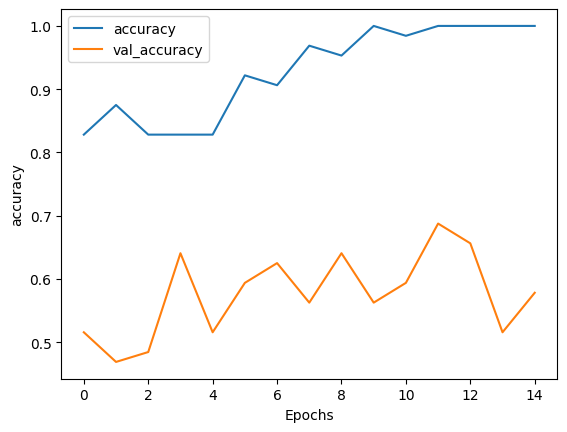

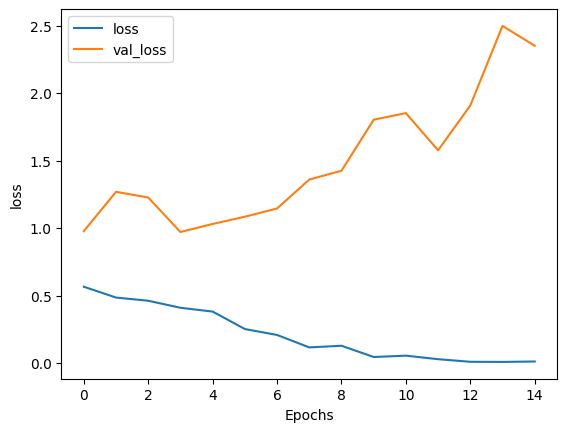

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
#Probaremos con un modelo mas robusto

model = Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(512, 512, 3)),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=128, activation="relu"),
  tf.keras.layers.Dense(units=64, activation="relu"),
  tf.keras.layers.Dense(units=3, activation="softmax")
])

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss = 'CategoricalCrossentropy',
                   metrics = ['accuracy'])

In [ ]:
 history = model.fit(
    X_train, y_train,
    epochs = 15,
    validation_data=(X_test, y_test),
    verbose=1,
    batch_size=16
)

Epoch 1/15
4/4 [==============================] - 6s 289ms/step - loss: 1.1882 - accuracy: 0.3594 - val_loss: 1.7998 - val_accuracy: 0.3594
Epoch 2/15
4/4 [==============================] - 1s 186ms/step - loss: 1.2118 - accuracy: 0.4844 - val_loss: 1.0835 - val_accuracy: 0.3594
Epoch 3/15
4/4 [==============================] - 1s 199ms/step - loss: 0.8761 - accuracy: 0.6406 - val_loss: 1.0265 - val_accuracy: 0.3906
Epoch 4/15
4/4 [==============================] - 1s 166ms/step - loss: 0.8014 - accuracy: 0.6719 - val_loss: 0.9862 - val_accuracy: 0.5469
Epoch 5/15
4/4 [==============================] - 1s 202ms/step - loss: 0.7209 - accuracy: 0.6250 - val_loss: 0.9876 - val_accuracy: 0.5625
Epoch 6/15
4/4 [==============================] - 1s 205ms/step - loss: 0.6441 - accuracy: 0.8125 - val_loss: 0.8485 - val_accuracy: 0.6719
Epoch 7/15
4/4 [==============================] - 1s 157ms/step - loss: 0.5013 - accuracy: 0.9375 - val_loss: 0.8330 - val_accuracy: 0.6250
Epoch 8/15
4/4 [====